
1. CARGANDO DATASET...
Cargando dataset de ejemplo de seaborn...

Dimensiones del dataset: (891, 15)

Primeras filas:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked   Class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark

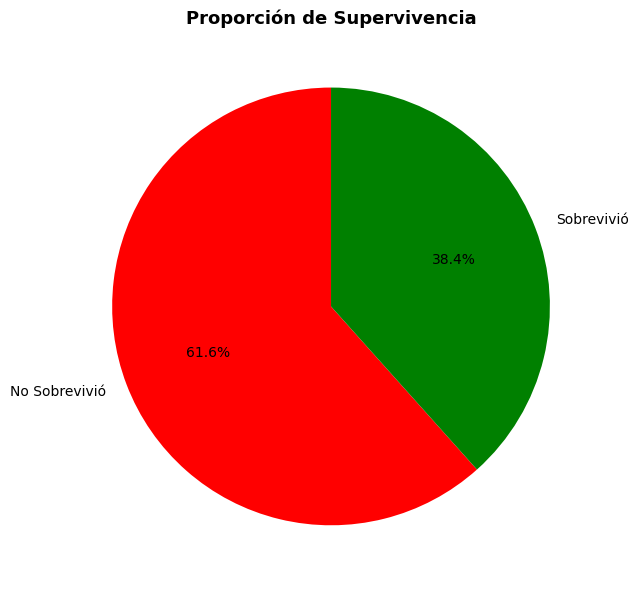


2. ANÁLISIS EXPLORATORIO DE DATOS

Valores nulos por columna:
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Porcentaje de valores nulos:
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Embarked        0.22
Class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64

3. PREPROCESAMIENTO DE DATOS

Características a utilizar: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

Tratamiento de valores nulos:
  - Age: rellenado con mediana (28.0)
  - Embarked: rellenado con moda (S)
  - Fare: rellenado con mediana (14.45)

Creando nu

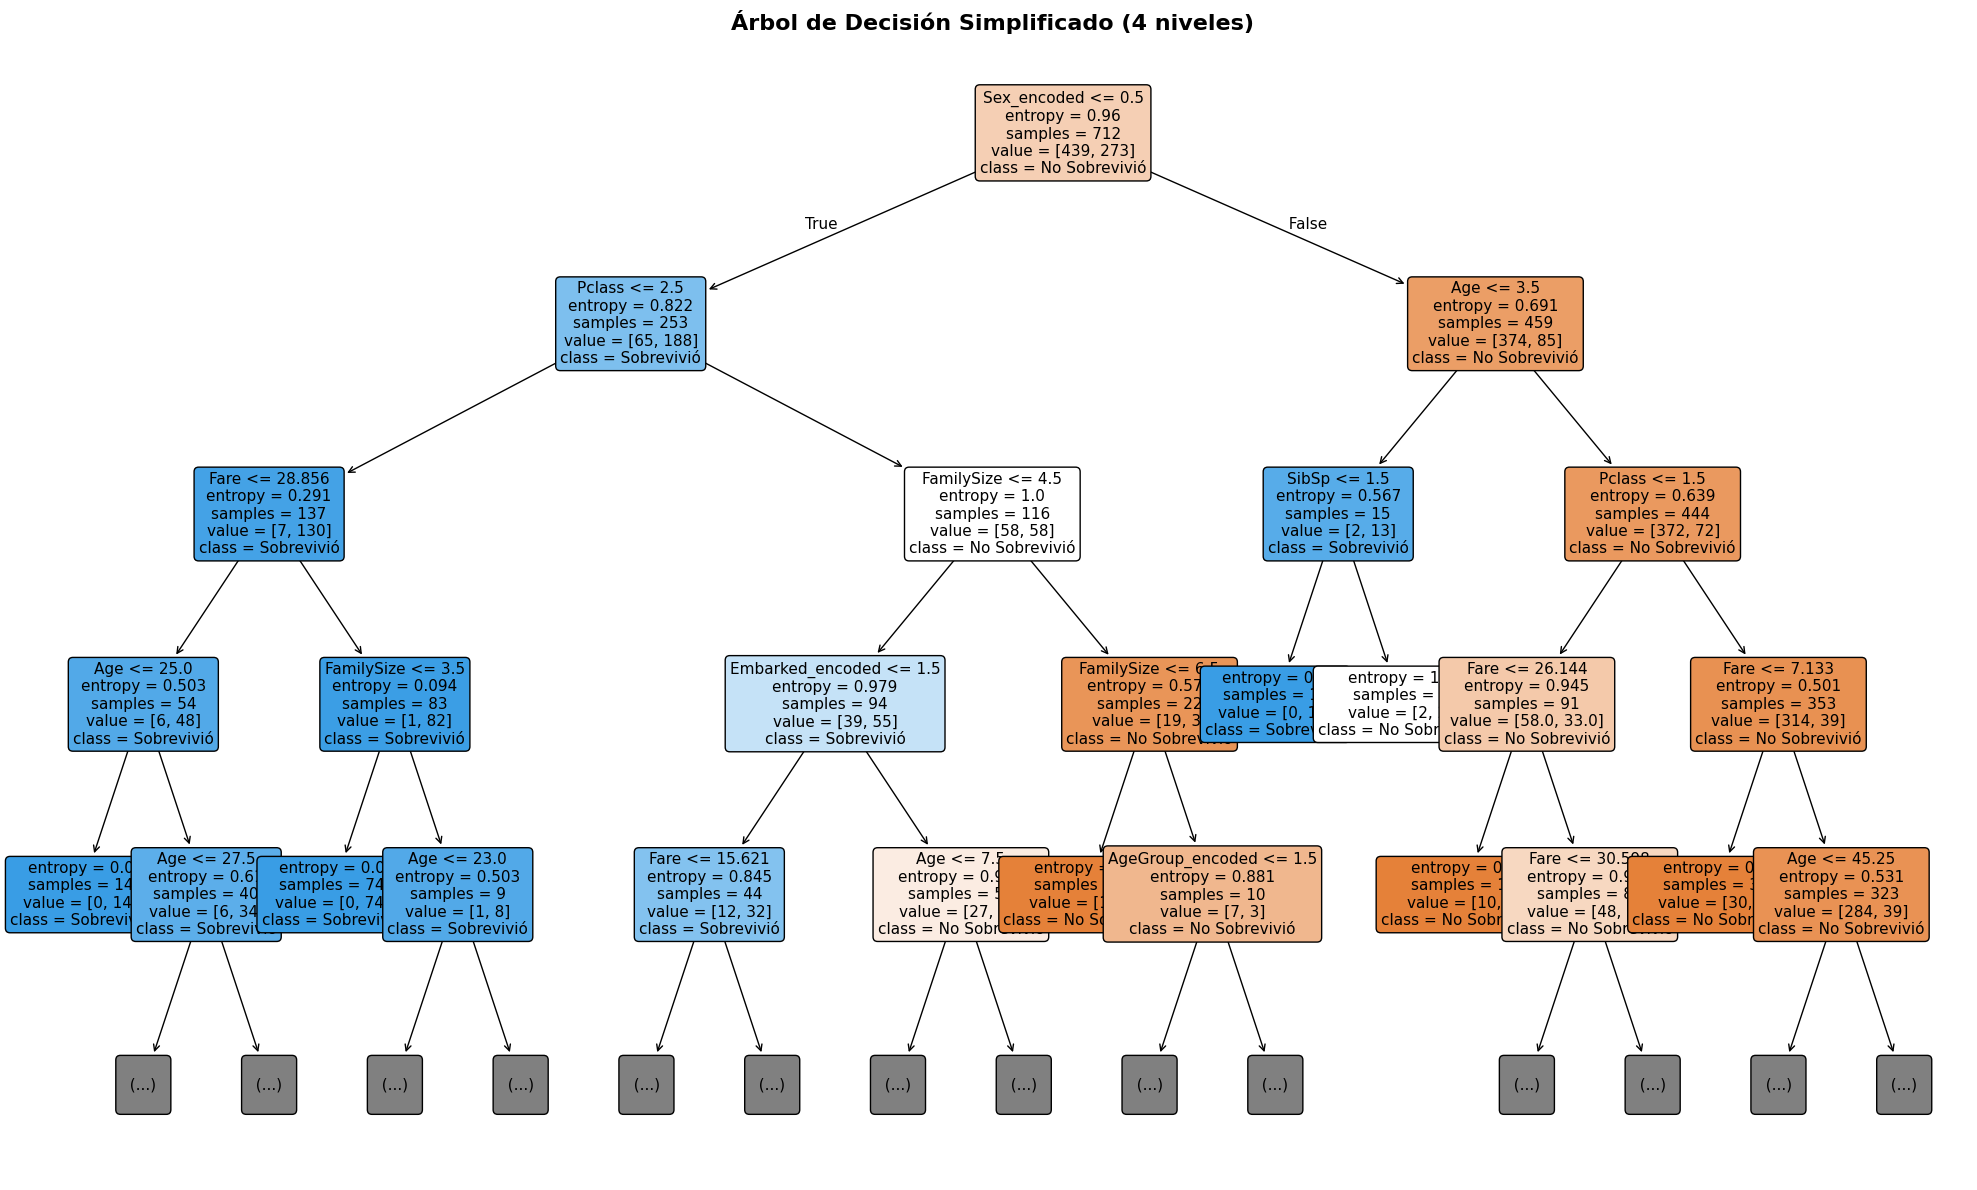


IMPORTANCIA DE CARACTERÍSTICAS
         Feature  Importance
     Sex_encoded    0.378213
          Pclass    0.174302
            Fare    0.173567
             Age    0.149035
      FamilySize    0.066186
Embarked_encoded    0.027704
           SibSp    0.014508
AgeGroup_encoded    0.011565
           Parch    0.003989
         IsAlone    0.000931

CONCLUSIONES Y RECOMENDACIONES

RESUMEN DEL MODELO:
------------------
✓ Modelo de Árbol de Decisión entrenado exitosamente
✓ Accuracy en test: 0.7709
✓ Precision: 0.7500
✓ Recall: 0.6087
✓ F1-Score: 0.6720
✓ AUC-ROC: 0.7891

HIPERPARÁMETROS ÓPTIMOS:
-----------------------
- criterion: entropy
- max_depth: 10
- max_features: None
- min_samples_leaf: 4
- min_samples_split: 2

CARACTERÍSTICAS MÁS IMPORTANTES:
-------------------------------
8. Sex_encoded: 0.3782
1. Pclass: 0.1743
5. Fare: 0.1736
2. Age: 0.1490
6. FamilySize: 0.0662

INTERPRETACIÓN:
--------------
- El modelo tiene un desempeño bueno
- Las características más importantes par

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                            accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("\n1. CARGANDO DATASET...")
#Cargamos el dataset
try:
    df = pd.read_csv('train.csv')
    print("Dataset cargado desde archivo local")
except:
    print("Cargando dataset de ejemplo de seaborn...")
    df = sns.load_dataset('titanic')
    df = df.rename(columns={'survived': 'Survived', 'pclass': 'Pclass', 
                           'sex': 'Sex', 'age': 'Age', 'sibsp': 'SibSp', 
                           'parch': 'Parch', 'fare': 'Fare', 
                           'embarked': 'Embarked', 'class': 'Class'})

print(f"\nDimensiones del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head(10))
print(f"\nInformación del dataset:")
print(df.info())
print(f"\nEstadísticas descriptivas:")
print(df.describe())

# Análisis de la variable objetivo
print(f"\n{'='*50}")
print("ANÁLISIS DE LA VARIABLE OBJETIVO (Survived)")
print(f"{'='*50}")
print(df['Survived'].value_counts())
print(f"\nDistribución porcentual:")
print(df['Survived'].value_counts(normalize=True) * 100)

# Visualización de supervivencia - SOLO GRÁFICO DE TORTA
fig, ax = plt.subplots(figsize=(8, 6))
survival_counts = df['Survived'].value_counts()
ax.pie(survival_counts, labels=['No Sobrevivió', 'Sobrevivió'],
       autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
ax.set_title('Proporción de Supervivencia', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. ANÁLISIS EXPLORATORIO
print(f"\n{'='*50}")
print("2. ANÁLISIS EXPLORATORIO DE DATOS")
print(f"{'='*50}")

# Valores nulos
print(f"\nValores nulos por columna:")
print(df.isnull().sum())
print(f"\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df) * 100).round(2))

# 3. PREPROCESAMIENTO DE DATOS
print(f"\n{'='*70}")
print("3. PREPROCESAMIENTO DE DATOS")
print(f"{'='*70}")

# Crear copia del dataframe
df_processed = df.copy()

# Seleccionar características relevantes
features_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
features_available = [f for f in features_to_use if f in df_processed.columns]

print(f"\nCaracterísticas a utilizar: {features_available}")

# Manejar valores nulos
print(f"\nTratamiento de valores nulos:")

# Age: rellenar con la mediana
if 'Age' in df_processed.columns:
    age_median = df_processed['Age'].median()
    df_processed['Age'].fillna(age_median, inplace=True)
    print(f"  - Age: rellenado con mediana ({age_median:.1f})")

# Embarked: rellenar con la moda
if 'Embarked' in df_processed.columns:
    embarked_mode = df_processed['Embarked'].mode()[0]
    df_processed['Embarked'].fillna(embarked_mode, inplace=True)
    print(f"  - Embarked: rellenado con moda ({embarked_mode})")

# Fare: rellenar con la mediana
if 'Fare' in df_processed.columns:
    fare_median = df_processed['Fare'].median()
    df_processed['Fare'].fillna(fare_median, inplace=True)
    print(f"  - Fare: rellenado con mediana ({fare_median:.2f})")

# Ingeniería de características
print(f"\nCreando nuevas características:")

# Tamaño de familia
if 'SibSp' in df_processed.columns and 'Parch' in df_processed.columns:
    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    features_available.append('FamilySize')
    print("  - FamilySize: SibSp + Parch + 1")

# Está solo
if 'FamilySize' in df_processed.columns:
    df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
    features_available.append('IsAlone')
    print("  - IsAlone: 1 si FamilySize == 1, 0 en caso contrario")

# Categoría de edad
if 'Age' in df_processed.columns:
    df_processed['AgeGroup'] = pd.cut(df_processed['Age'],
                                      bins=[0, 12, 18, 35, 60, 100],
                                      labels=['Niño', 'Adolescente', 'Adulto Joven',
                                             'Adulto', 'Senior'])
    print("  - AgeGroup: Categorías de edad")

# Codificación de variables categóricas
print(f"\n{'='*50}")
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print(f"{'='*50}")

label_encoders = {}

# Sex
if 'Sex' in df_processed.columns:
    le_sex = LabelEncoder()
    df_processed['Sex_encoded'] = le_sex.fit_transform(df_processed['Sex'])
    label_encoders['Sex'] = le_sex
    print(f"  - Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
    features_available.append('Sex_encoded')
    features_available.remove('Sex')

# Embarked
if 'Embarked' in df_processed.columns:
    le_embarked = LabelEncoder()
    df_processed['Embarked_encoded'] = le_embarked.fit_transform(df_processed['Embarked'])
    label_encoders['Embarked'] = le_embarked
    print(f"  - Embarked: {dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_)))}")
    features_available.append('Embarked_encoded')
    features_available.remove('Embarked')

# AgeGroup
if 'AgeGroup' in df_processed.columns:
    le_agegroup = LabelEncoder()
    df_processed['AgeGroup_encoded'] = le_agegroup.fit_transform(df_processed['AgeGroup'])
    label_encoders['AgeGroup'] = le_agegroup
    print(f"  - AgeGroup: {dict(zip(le_agegroup.classes_, le_agegroup.transform(le_agegroup.classes_)))}")
    features_available.append('AgeGroup_encoded')

print(f"\n✓ Preprocesamiento completado")
print(f"Características finales: {features_available}")

# Preparar datos para el modelo
X = df_processed[features_available]
y = df_processed['Survived']

print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# 4. CONSTRUCCIÓN DEL ÁRBOL DE DECISIÓN
print(f"\n{'='*70}")
print("4. CONSTRUCCIÓN DEL ÁRBOL DE DECISIÓN")
print(f"{'='*70}")

# Modelo base sin ajustar
print("\nEntrenando modelo base (sin ajuste de hiperparámetros)...")
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

y_pred_base = dt_base.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"✓ Accuracy del modelo base: {accuracy_base:.4f}")

# 5. AJUSTE DE HIPERPARÁMETROS
print(f"\n{'='*70}")
print("5. AJUSTE DE HIPERPARÁMETROS")
print(f"{'='*70}")

print("\nHIPERPARÁMETROS PRINCIPALES DE ÁRBOL DE DECISIÓN:")
print("-" * 50)

# Grid Search para encontrar mejores hiperparámetros
print("\nRealizando Grid Search para encontrar mejores hiperparámetros...")
print("Esto puede tomar algunos minutos...")

param_grid = {
    'max_depth': [3, 5, 7, 10, None], # profundidad maxima del arbol
    'min_samples_split': [2, 5, 10, 20], #Número minimo de muestras requeridas
    'min_samples_leaf': [1, 2, 4, 8], # Número minimo de muestras en un nodo hoja
    'criterion': ['gini', 'entropy'], # mide la calidad de una división, mide impureza, mide ganancia de información
    'max_features': ['sqrt', 'log2', None] # número de caracteristicas a considerar en cada división
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Grid Search completado")
print(f"\nMejores hiperparámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  - {param}: {value}")

print(f"\nMejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

# Entrenar modelo con mejores hiperparámetros
dt_optimized = grid_search.best_estimator_
y_pred_optimized = dt_optimized.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"\nComparación de modelos:")
print(f"  - Modelo base: {accuracy_base:.4f}")
print(f"  - Modelo optimizado: {accuracy_optimized:.4f}")
print(f"  - Mejora: {(accuracy_optimized - accuracy_base)*100:.2f}%")

# 6. EVALUACIÓN DEL MODELO
print(f"\n{'='*70}")
print("6. EVALUACIÓN DEL MODELO OPTIMIZADO")
print(f"{'='*70}")

# Métricas de clasificación
print("\nMÉTRICAS DE CLASIFICACIÓN:")
print("-" * 50)

accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print(f"Accuracy:  {accuracy:.4f} - Proporción de predicciones correctas")
print(f"Precision: {precision:.4f} - De los predichos como sobrevivientes, cuántos lo fueron")
print(f"Recall:    {recall:.4f} - De los sobrevivientes reales, cuántos fueron detectados")
print(f"F1-Score:  {f1:.4f} - Media armónica entre precisión y recall")

# Matriz de confusión
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)

cm = confusion_matrix(y_test, y_pred_optimized)
print(cm)
print(f"\nInterpretación:")
print(f"  - Verdaderos Negativos (TN): {cm[0, 0]} - Correctamente predicho No Sobrevivió")
print(f"  - Falsos Positivos (FP): {cm[0, 1]} - Incorrectamente predicho Sobrevivió")
print(f"  - Falsos Negativos (FN): {cm[1, 0]} - Incorrectamente predicho No Sobrevivió")
print(f"  - Verdaderos Positivos (TP): {cm[1, 1]} - Correctamente predicho Sobrevivió")

# Reporte de clasificación
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN DETALLADO")
print("="*50)
print(classification_report(y_test, y_pred_optimized,
                          target_names=['No Sobrevivió', 'Sobrevivió']))

# Curva ROC
y_pred_proba = dt_optimized.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"\nAUC-ROC Score: {roc_auc:.4f}")

# Validación cruzada
print(f"\n{'='*50}")
print("VALIDACIÓN CRUZADA (5-Fold)")
print(f"{'='*50}")

cv_scores = cross_val_score(dt_optimized, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nAccuracy scores por fold: {cv_scores}")
print(f"Accuracy promedio: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 7. VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN
print(f"\n{'='*70}")
print("7. VISUALIZACIÓN DEL ÁRBOL DE DECISIÓN")
print(f"{'='*70}")

# Árbol simplificado (primeros niveles)
plt.figure(figsize=(20, 12))
plot_tree(dt_optimized,
         feature_names=features_available,
         class_names=['No Sobrevivió', 'Sobrevivió'],
         filled=True,
         rounded=True,
         fontsize=11,
         max_depth=4)
plt.title('Árbol de Decisión Simplificado (4 niveles)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': features_available,
    'Importance': dt_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n{'='*50}")
print("IMPORTANCIA DE CARACTERÍSTICAS")
print(f"{'='*50}")
print(feature_importance.to_string(index=False))

# 8. CONCLUSIONES
print(f"\n{'='*70}")
print("CONCLUSIONES Y RECOMENDACIONES")
print(f"{'='*70}")

conclusiones = f"""
RESUMEN DEL MODELO:
------------------
✓ Modelo de Árbol de Decisión entrenado exitosamente
✓ Accuracy en test: {accuracy:.4f}
✓ Precision: {precision:.4f}
✓ Recall: {recall:.4f}
✓ F1-Score: {f1:.4f}
✓ AUC-ROC: {roc_auc:.4f}

HIPERPARÁMETROS ÓPTIMOS:
-----------------------
{chr(10).join([f'- {k}: {v}' for k, v in grid_search.best_params_.items()])}

CARACTERÍSTICAS MÁS IMPORTANTES:
-------------------------------
{chr(10).join([f'{i+1}. {row["Feature"]}: {row["Importance"]:.4f}' 
               for i, row in feature_importance.head(5).iterrows()])}

INTERPRETACIÓN:
--------------
- El modelo tiene un desempeño {'excelente' if accuracy > 0.85 else 'bueno' if accuracy > 0.75 else 'aceptable'}
- Las características más importantes para predecir supervivencia son: 
  {', '.join(feature_importance['Feature'].head(3).tolist())}
- El árbol de decisión es interpretable y permite entender las reglas de clasificación
"""

print(conclusiones)

print("\n✓ Análisis completado exitosamente")
print("="*70)